In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [8]:
def compute_sum(n, d):
    total_sum = 0
    for w in range(1, d + 1):
        binom_n_w = math.comb(n, w)  # Compute binomial coefficient C(n, w)
        binom_d_w = math.comb(d, w)  # Compute binomial coefficient C(d, w)
        total_sum += (2 ** w) * binom_n_w * binom_d_w  # Add the term to the sum
    return total_sum

In [41]:
##### Problem
in_dim = 2
out_dim = 1
degree = 4
shape = [in_dim, compute_sum(in_dim, degree), 1]
h = [16]
Batch_size = 16
depth = ((len(h) + 1) * len(shape)) - 1 

In [42]:
params = 0
for i in range(1,len(shape)):
    params += shape[i-1] * shape[i] * h[0]
params *= 2

In [83]:
import torch
import torch.nn as nn

import torch
import torch.nn as nn

class MLayerNN(nn.Module):
    def __init__(self, in_dim, out_dim, depth, N_params):
        super(MLayerNN, self).__init__()
        
        # Initialize layer sizes list
        layer_dims = [in_dim]  # First layer is input dim
        h = int(N_params / ((in_dim + out_dim) * (depth)))
        print(h)
        while (in_dim * h + (depth-3) * h**2 + h * out_dim) > params:
            h -= 1
        # Compute hidden dimensions
        hidden_dim = N_params // ((depth) * (in_dim + out_dim))  # Approximate hidden size
        hidden_dim = 36
        layer_dims += [int(h)] * (depth - 2)  # Set all hidden layers to hidden_dim
        layer_dims.append(out_dim)  # Last layer is output dim
        print(layer_dims)
        self.layers = nn.ModuleList([
            nn.Linear(layer_dims[i-1], layer_dims[i]) for i in range(1,depth)
        ])
    
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))  # Apply ReLU activation
        return self.layers[-1](x)  # Final layer without activation



model = MLayerNN(in_dim, out_dim, depth = depth, N_params = params)
total_params = sum(p.numel() for p in model.parameters() if p.ndimension() > 1)
print(params)
print(model)
print(f"Total number of parameters (ignoring biases): {total_params}")

256
[2, 43, 43, 43, 1]
3840
MLayerNN(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=43, bias=True)
    (1-2): 2 x Linear(in_features=43, out_features=43, bias=True)
    (3): Linear(in_features=43, out_features=1, bias=True)
  )
)
Total number of parameters (ignoring biases): 3827


tensor([[-2.6959e-02],
        [ 1.7691e-02],
        [-2.6845e-02],
        [-2.7499e-02],
        [-2.1278e-02],
        [-1.2582e-02],
        [-1.7747e-02],
        [-2.7827e-02],
        [-2.8056e-02],
        [-2.4217e-02],
        [-9.1473e-03],
        [-3.1127e-02],
        [ 1.1732e-01],
        [-1.8748e-03],
        [-1.4882e-02],
        [ 2.2830e-03],
        [-9.1100e-03],
        [ 1.4783e-02],
        [ 5.9446e-02],
        [-2.2879e-02],
        [-2.3144e-02],
        [-7.8614e-03],
        [-2.9062e-02],
        [ 4.8888e-02],
        [ 2.4774e-02],
        [ 4.3366e-03],
        [ 9.7315e-03],
        [-1.3093e-02],
        [-2.7817e-02],
        [-2.5507e-02],
        [-2.7846e-02],
        [-2.6806e-02],
        [ 1.7193e-02],
        [ 2.7750e-02],
        [-7.9496e-03],
        [-2.2901e-03],
        [ 2.6484e-02],
        [-3.7716e-03],
        [-2.5245e-02],
        [-2.3705e-02],
        [-2.1301e-02],
        [-2.6689e-02],
        [-2.4850e-02],
        [-5

In [89]:
import torch
import itertools

class RandomPolynomial(torch.nn.Module):
    def __init__(self, input_dim, degree):
        super(RandomPolynomial, self).__init__()
        self.input_dim = input_dim
        self.degree = degree
        self.exponents = self.generate_exponents(degree, input_dim)
        torch.manual_seed(42)
        self.coefficients = torch.randn(len(self.exponents))
        print(self.exponents)
        print(self.coefficients)
        self.coefficients = torch.tensor([-0.8828,  0.0232, -0.9740, -1.3008,  0.6536, -0.2738,  2.1751,  0.0991,
        -1.3011,  1.4721,  0.7255,  0.1220,  0.9422, -1.2801, -0.3082])

    def forward(self, X):
        batch_size = X.shape[0]
        result = torch.zeros(batch_size, 1)

        # For each monomial (term) in the polynomial, compute the corresponding product of powers of X
        for idx, exp in enumerate(self.exponents):
            term = torch.ones(batch_size, 1)
            for dim, e in enumerate(exp):
                term *= X[:, dim].pow(e).view(-1, 1)
            result += self.coefficients[idx] * term
        return result

    def generate_exponents(self, degree, input_dim):
        exponents = []
        for exp_tuple in itertools.product(range(degree + 1), repeat=input_dim):
            if sum(exp_tuple) <= degree:
                exponents.append(exp_tuple)
        return exponents
    
poly = RandomPolynomial(input_dim=in_dim, degree=degree)


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (4, 0)]
tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
         0.4617,  0.2674,  0.5349,  0.8094,  1.1103, -1.6898, -0.9890])


Epoch [1/1000], Loss: 139.185063, lr: 0.001000
Epoch [2/1000], Loss: 62.757212, lr: 0.001000
Epoch [3/1000], Loss: 121.266628, lr: 0.001000
Epoch [4/1000], Loss: 42.956143, lr: 0.001000
Epoch [5/1000], Loss: 83.115372, lr: 0.001000
Epoch [6/1000], Loss: 93.570888, lr: 0.001000
Epoch [7/1000], Loss: 27.437396, lr: 0.001000
Epoch [8/1000], Loss: 26.375594, lr: 0.001000
Epoch [9/1000], Loss: 23.388312, lr: 0.001000
Epoch [10/1000], Loss: 60.727310, lr: 0.001000
Epoch [11/1000], Loss: 26.880764, lr: 0.001000
Epoch [12/1000], Loss: 24.024204, lr: 0.001000
Epoch [13/1000], Loss: 20.066403, lr: 0.001000
Epoch [14/1000], Loss: 13.582749, lr: 0.001000
Epoch [15/1000], Loss: 9.602672, lr: 0.001000
Epoch [16/1000], Loss: 11.037294, lr: 0.001000
Epoch [17/1000], Loss: 6.963205, lr: 0.001000
Epoch [18/1000], Loss: 6.509458, lr: 0.001000
Epoch [19/1000], Loss: 5.395535, lr: 0.001000
Epoch [20/1000], Loss: 8.083304, lr: 0.001000
Epoch [21/1000], Loss: 26.056080, lr: 0.001000
Epoch [22/1000], Loss: 9.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.107279, lr: 0.001000


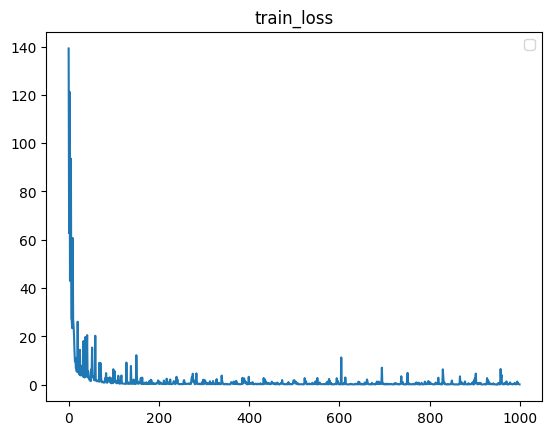

Training Complete!


In [91]:
import time
epochs = 1000
train_loss = []
model.train()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0)
criterion = torch.nn.MSELoss()
for epoch in range(epochs):
    running_loss = 0.0 
    for samples in range(100):
        start_time = time.time()
        optimizer.zero_grad()
        input = torch.randn(Batch_size, in_dim)
        target = poly(input)
        outputs = model(input)
        loss = criterion(target, outputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / 100
    train_loss.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
plt.plot(train_loss)
plt.title(f'train_loss')
plt.legend()
plt.show()
print("Training Complete!")

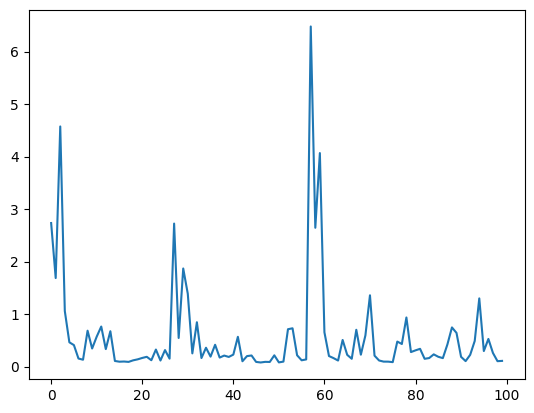

In [92]:
plt.plot(train_loss[-100:])
plt.show()

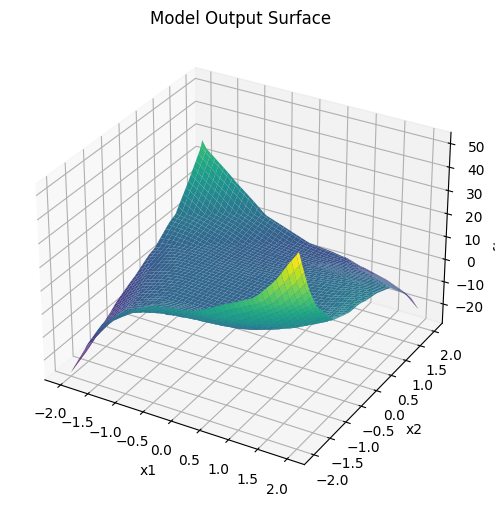

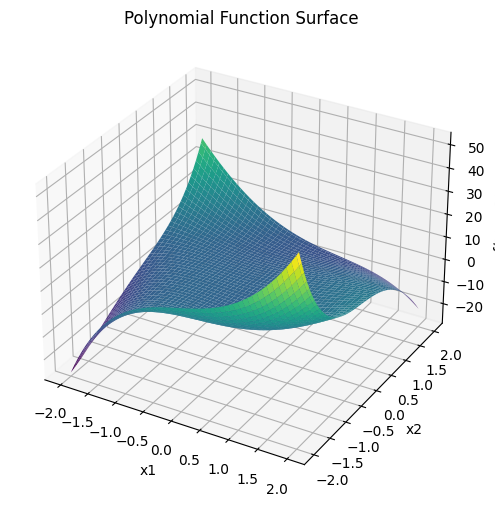

In [94]:
import torch
import matplotlib.pyplot as plt


model.eval()  # Set model to evaluation mode

# Create a grid of x1 and x2 values
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)

# Compute model output
with torch.no_grad():
    Z = model(X_input).numpy().reshape(X1.shape)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Model Output Surface')

plt.show()

x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = poly(X_input).numpy().reshape(X1.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Polynomial Function Surface')

plt.show()